In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
file_path = "Amazon Sale Report.csv"
data = pd.read_csv(file_path, encoding='latin-1', on_bad_lines='skip')

In [4]:
print("Initial Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("\nData Types:\n", data.dtypes)

Initial Shape: (128976, 21)
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS']

Data Types:
 index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object


In [5]:
if 'Month_Year' not in data.columns and 'Month-Year' in data.columns:
    data.rename(columns={'Month-Year': 'Month_Year'}, inplace=True)

In [6]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

<ipython-input-6-b63fab1fd0d2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [7]:
data['Amount'] = data['Amount'].replace('[\$,₹,]', '', regex=True)
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [8]:
data['Qty'] = pd.to_numeric(data['Qty'], errors='coerce')

In [9]:
print("\nMissing Values (Before):\n", data.isnull().sum())


Missing Values (Before):
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [10]:
data.dropna(subset=['Date', 'Amount', 'Qty'], inplace=True)

In [11]:
categorical_columns = ['Category', 'Size', 'ship-city', 'ship-state', 'Fulfilment', 'B2B']
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].fillna('Unknown')

In [12]:
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype('category')

In [13]:
print("\nCleaned Shape:", data.shape)
print("\nData Types After Cleaning:\n", data.dtypes)
print("\nSample Data:\n", data.head())


Cleaned Shape: (121176, 21)

Data Types After Cleaning:
 index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                  category
Sales Channel                 object
ship-service-level            object
Category                    category
Size                        category
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                   category
ship-state                  category
ship-postal-code             float64
ship-country                  object
B2B                         category
fulfilled-by                  object
New                          float64
PendingS                     float64
dtype: object

Sample Data:
    index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     C

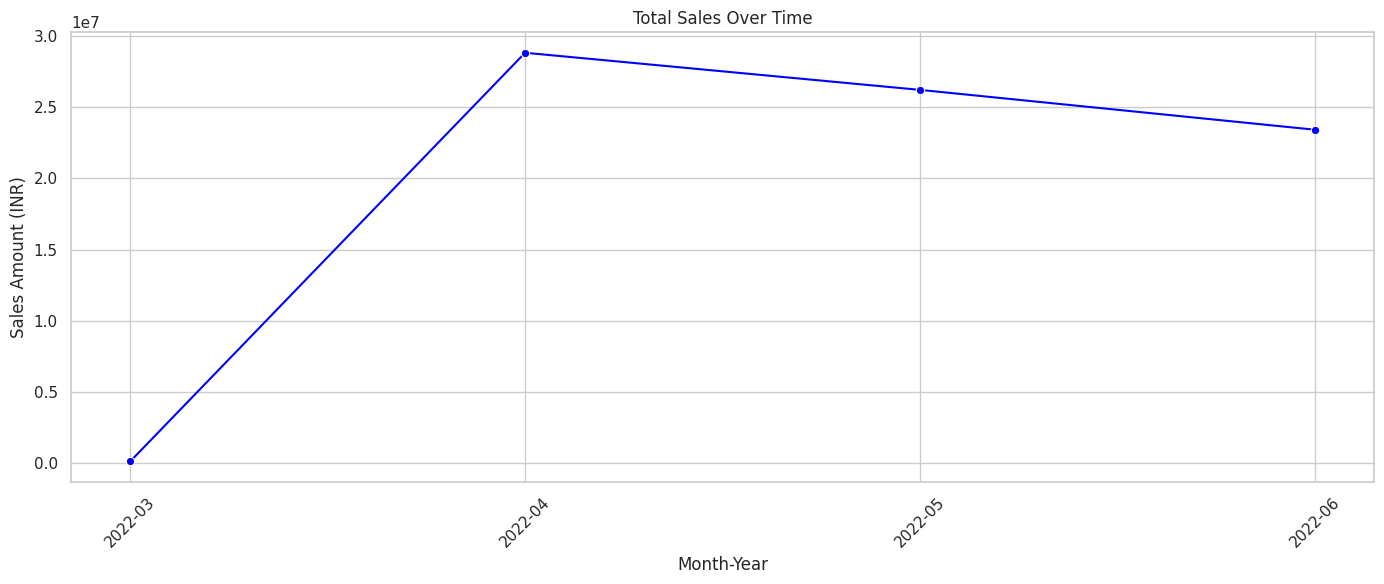

In [14]:
# Create 'Month_Year' column if not already in dataset
data['Month_Year'] = data['Date'].dt.to_period('M').astype(str)

# Group by Month_Year for total sales
monthly_sales = data.groupby('Month_Year')['Amount'].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Amount', marker='o', color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-15-d857c237f71b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()
<ipython-input-15-d857c237f71b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales.head(10), y='Category', x='Amount', palette='Blues_r')


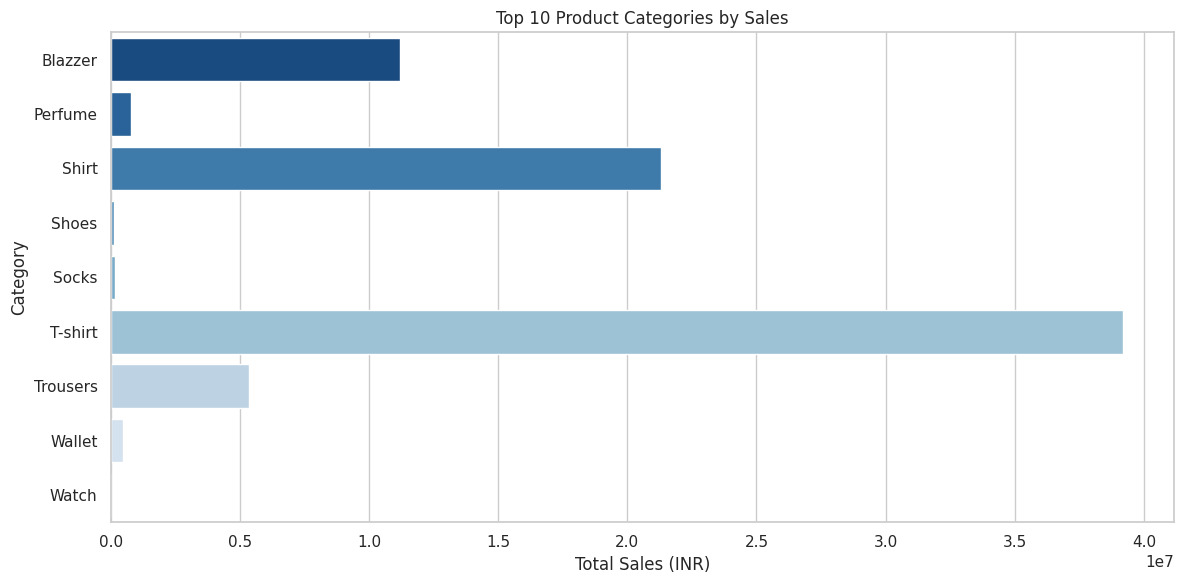

In [15]:
category_sales = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales.head(10), y='Category', x='Amount', palette='Blues_r')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

<ipython-input-16-7fcb3db13cdf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_qty = data.groupby('Category')['Qty'].sum().sort_values(ascending=False).reset_index()
<ipython-input-16-7fcb3db13cdf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_qty.head(10), x='Qty', y='Category', palette='crest')


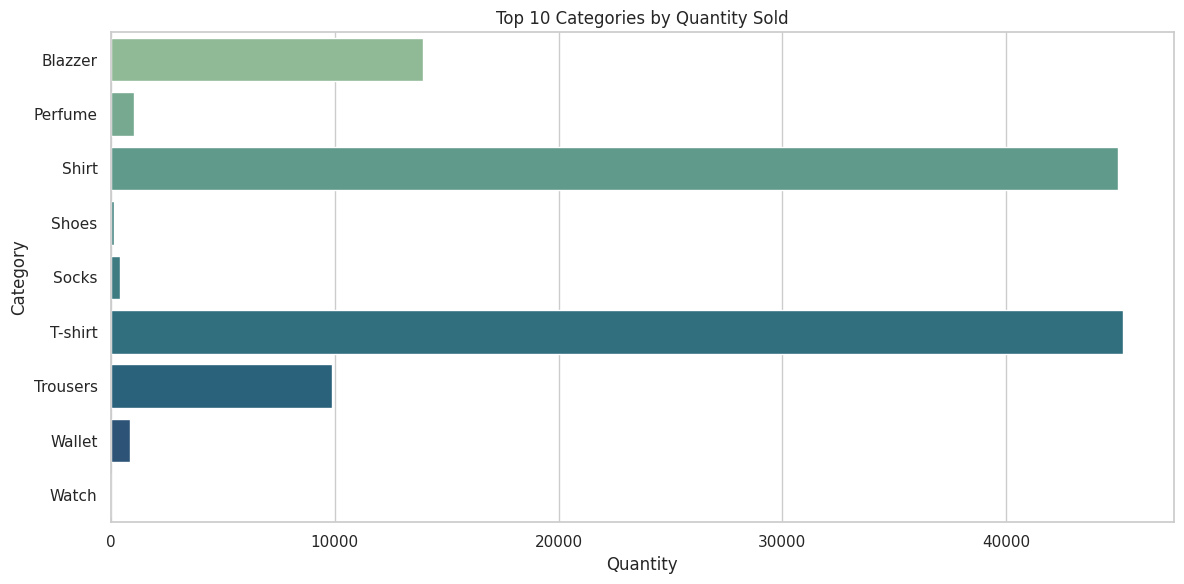

In [16]:
category_qty = data.groupby('Category')['Qty'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_qty.head(10), x='Qty', y='Category', palette='crest')
plt.title('Top 10 Categories by Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

<ipython-input-17-18c9bd772aca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Fulfilment', palette='Set2')


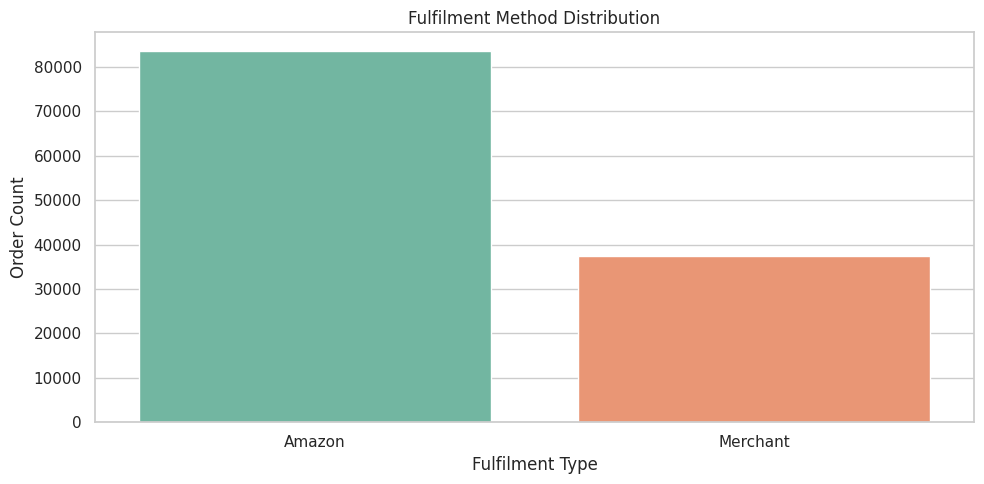

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Fulfilment', palette='Set2')
plt.title('Fulfilment Method Distribution')
plt.xlabel('Fulfilment Type')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

<ipython-input-24-e27181dab804>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_sales = data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
<ipython-input-24-e27181dab804>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales, y='ship-city', x='Amount', palette='coolwarm')


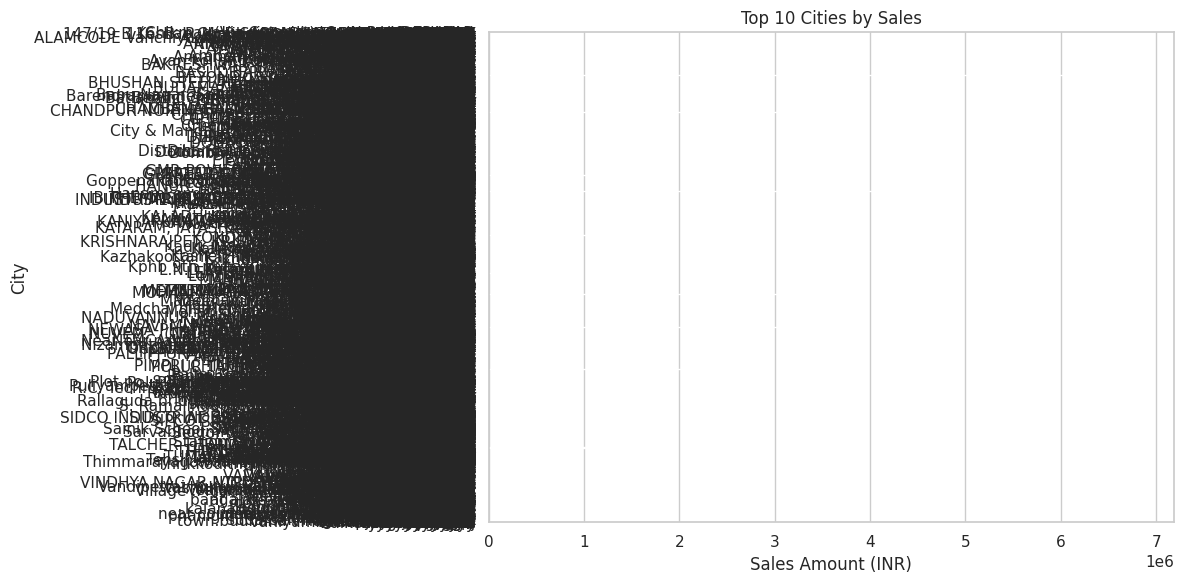

In [24]:
city_sales = data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=city_sales, y='ship-city', x='Amount', palette='coolwarm')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales Amount (INR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

<ipython-input-20-a658dfba2862>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='B2B', palette='pastel')


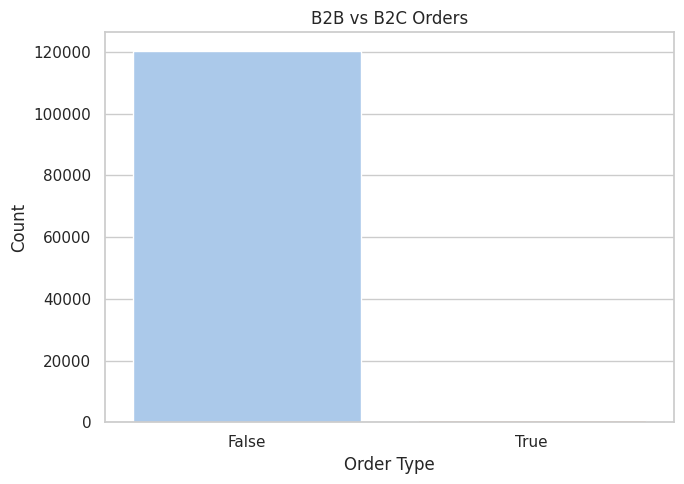

<ipython-input-20-a658dfba2862>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b2b_sales = data.groupby('B2B')['Amount'].sum().reset_index()
<ipython-input-20-a658dfba2862>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_sales, x='B2B', y='Amount', palette='Set1')


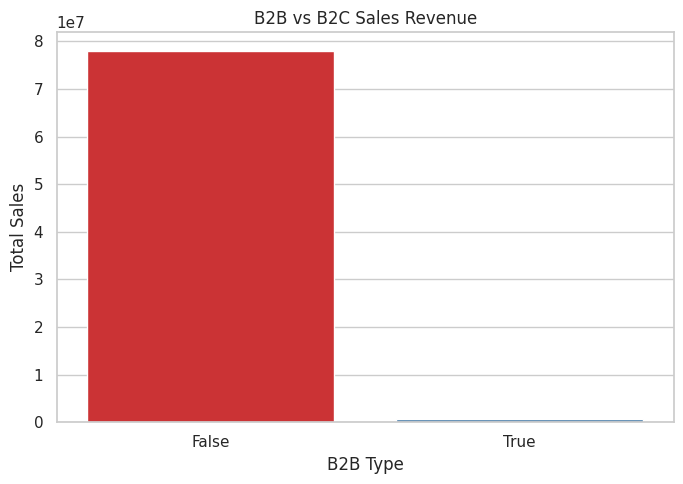

In [20]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='B2B', palette='pastel')
plt.title('B2B vs B2C Orders')
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Optional: Compare revenue
b2b_sales = data.groupby('B2B')['Amount'].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=b2b_sales, x='B2B', y='Amount', palette='Set1')
plt.title('B2B vs B2C Sales Revenue')
plt.xlabel('B2B Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

<ipython-input-21-b645757d5450>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Courier Status', order=data['Courier Status'].value_counts().index, palette='Set3')


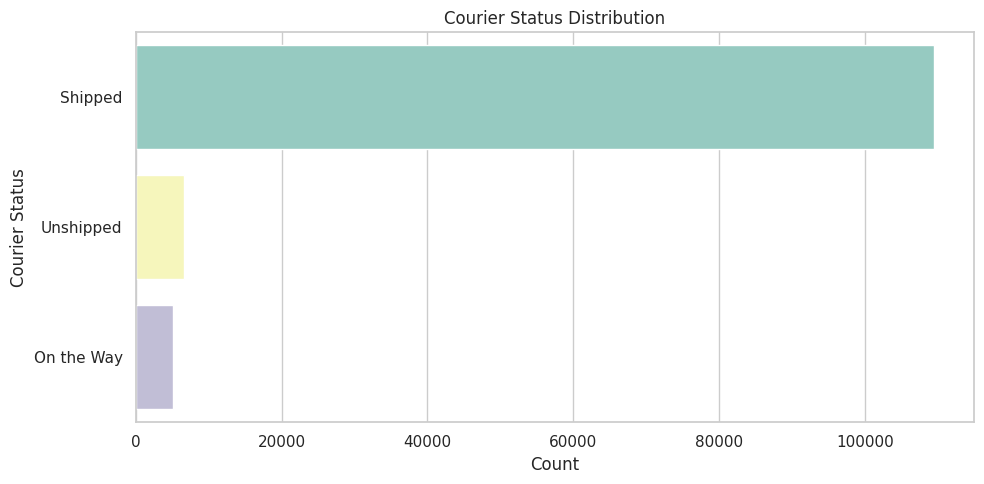

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y='Courier Status', order=data['Courier Status'].value_counts().index, palette='Set3')
plt.title('Courier Status Distribution')
plt.xlabel('Count')
plt.ylabel('Courier Status')
plt.tight_layout()
plt.show()

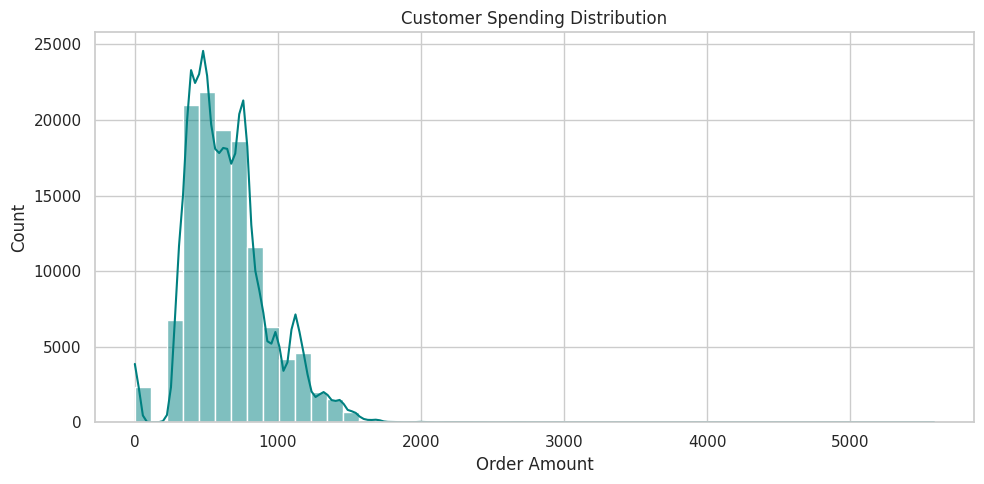

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Amount', bins=50, kde=True, color='teal')
plt.title('Customer Spending Distribution')
plt.xlabel('Order Amount')
plt.tight_layout()
plt.show()

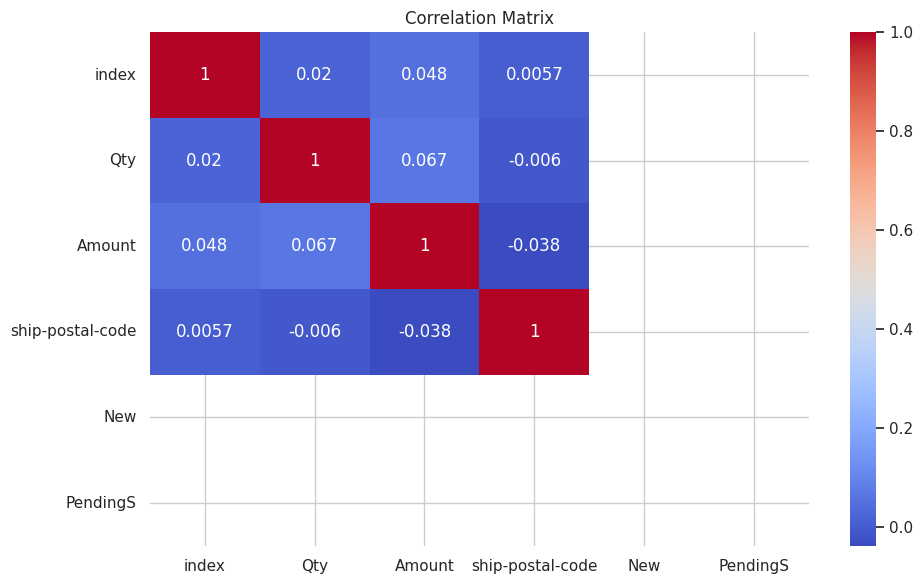

In [23]:
# Select numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()